In [1]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()

In [13]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Nubmer of episodes to sample.
        discount_factor: Lambda discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    # Implement this!
    for i_episode in xrange(num_episodes):
        observation = env.reset()
        current_epi = [(observation, 0)]
        while True:
            action = sample_policy(observation)
            action = np.argmax(action)
            observation, reward, done, _ = env.step(action)
            current_epi.append((observation, reward))
            if done:
                current_epi.reverse()
                current_reward = 0.0
                for state, reward in current_epi:
                    returns_sum[state] += current_reward
                    returns_count[state] += 1
                    current_reward += reward
                break
    print returns_count
    for k in returns_sum.keys():
        V[k] = float(returns_sum[k]) / float(returns_count[k])
    return V    

In [14]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return np.array([1.0, 0.0]) if score >= 20 else np.array([0.0, 1.0])

defaultdict(<type 'float'>, {(18, 6, False): 89.0, (22, 5, False): 95.0, (17, 8, True): 14.0, (20, 6, False): 262.0, (13, 1, False): 105.0, (12, 10, True): 24.0, (22, 6, False): 92.0, (27, 10, False): 195.0, (12, 7, False): 101.0, (24, 8, False): 61.0, (14, 2, True): 18.0, (29, 2, False): 37.0, (14, 1, True): 6.0, (13, 4, False): 96.0, (22, 3, False): 83.0, (27, 9, False): 50.0, (24, 5, False): 69.0, (20, 1, True): 34.0, (29, 5, False): 37.0, (13, 7, False): 91.0, (26, 9, False): 57.0, (18, 7, True): 19.0, (19, 10, False): 447.0, (21, 6, True): 90.0, (29, 8, False): 43.0, (17, 5, False): 108.0, (13, 10, False): 401.0, (26, 10, False): 229.0, (22, 9, False): 78.0, (16, 1, True): 11.0, (19, 9, False): 132.0, (21, 1, True): 86.0, (22, 10, False): 337.0, (20, 9, True): 50.0, (19, 4, False): 90.0, (17, 3, False): 115.0, (16, 8, True): 10.0, (28, 6, False): 32.0, (14, 9, False): 88.0, (19, 3, False): 108.0, (18, 4, True): 13.0, (20, 7, True): 34.0, (12, 2, False): 104.0, (26, 5, False): 48.0

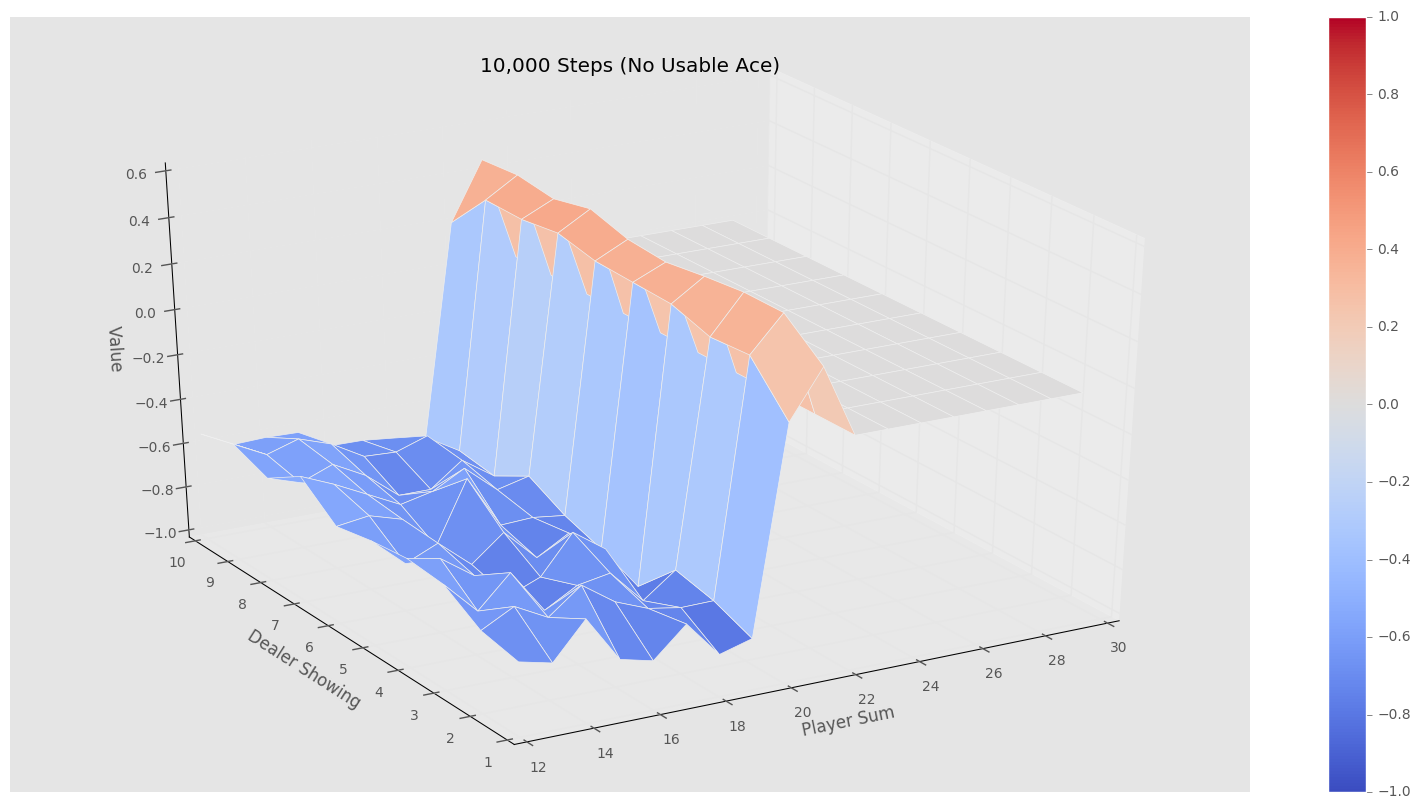

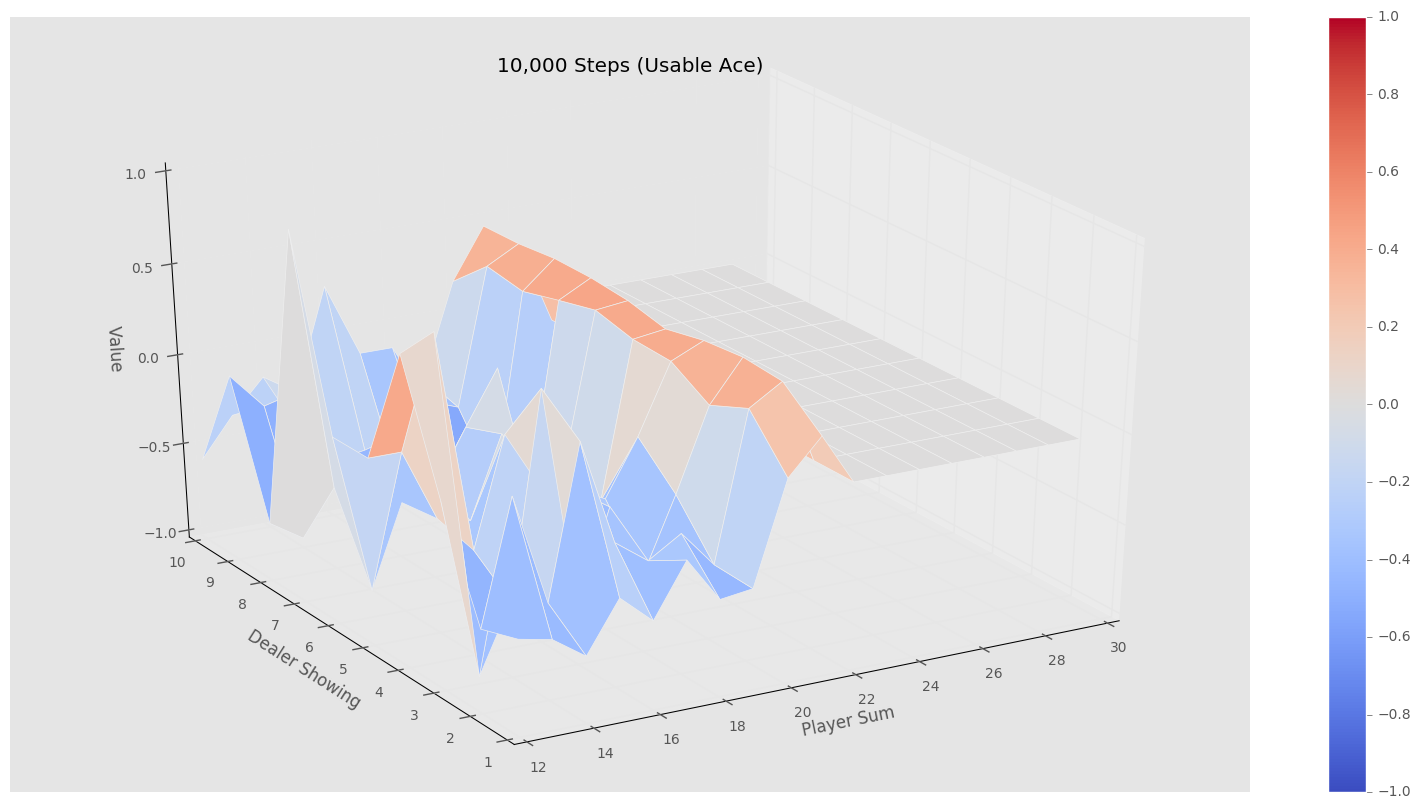

defaultdict(<type 'float'>, {(18, 6, False): 4.0, (22, 5, False): 1.0, (17, 8, True): 2.0, (20, 6, False): 10.0, (13, 1, False): 4.0, (12, 10, True): 2.0, (22, 6, False): 1.0, (27, 10, False): 11.0, (24, 8, False): 4.0, (29, 2, False): 3.0, (13, 4, False): 5.0, (22, 3, False): 4.0, (27, 9, False): 3.0, (24, 5, False): 7.0, (20, 1, True): 4.0, (29, 5, False): 1.0, (13, 7, False): 5.0, (26, 9, False): 4.0, (19, 10, False): 24.0, (21, 6, True): 4.0, (15, 4, True): 1.0, (17, 5, False): 6.0, (13, 10, False): 18.0, (26, 10, False): 15.0, (22, 9, False): 4.0, (19, 9, False): 3.0, (22, 10, False): 16.0, (20, 9, True): 2.0, (19, 4, False): 3.0, (17, 3, False): 9.0, (21, 8, False): 6.0, (14, 9, False): 4.0, (19, 3, False): 3.0, (18, 4, True): 1.0, (14, 6, False): 4.0, (12, 2, False): 2.0, (26, 5, False): 1.0, (14, 10, False): 21.0, (12, 7, False): 2.0, (17, 9, False): 5.0, (26, 6, False): 3.0, (15, 8, True): 1.0, (14, 7, False): 5.0, (18, 10, True): 2.0, (28, 6, False): 4.0, (12, 4, False): 6.0,

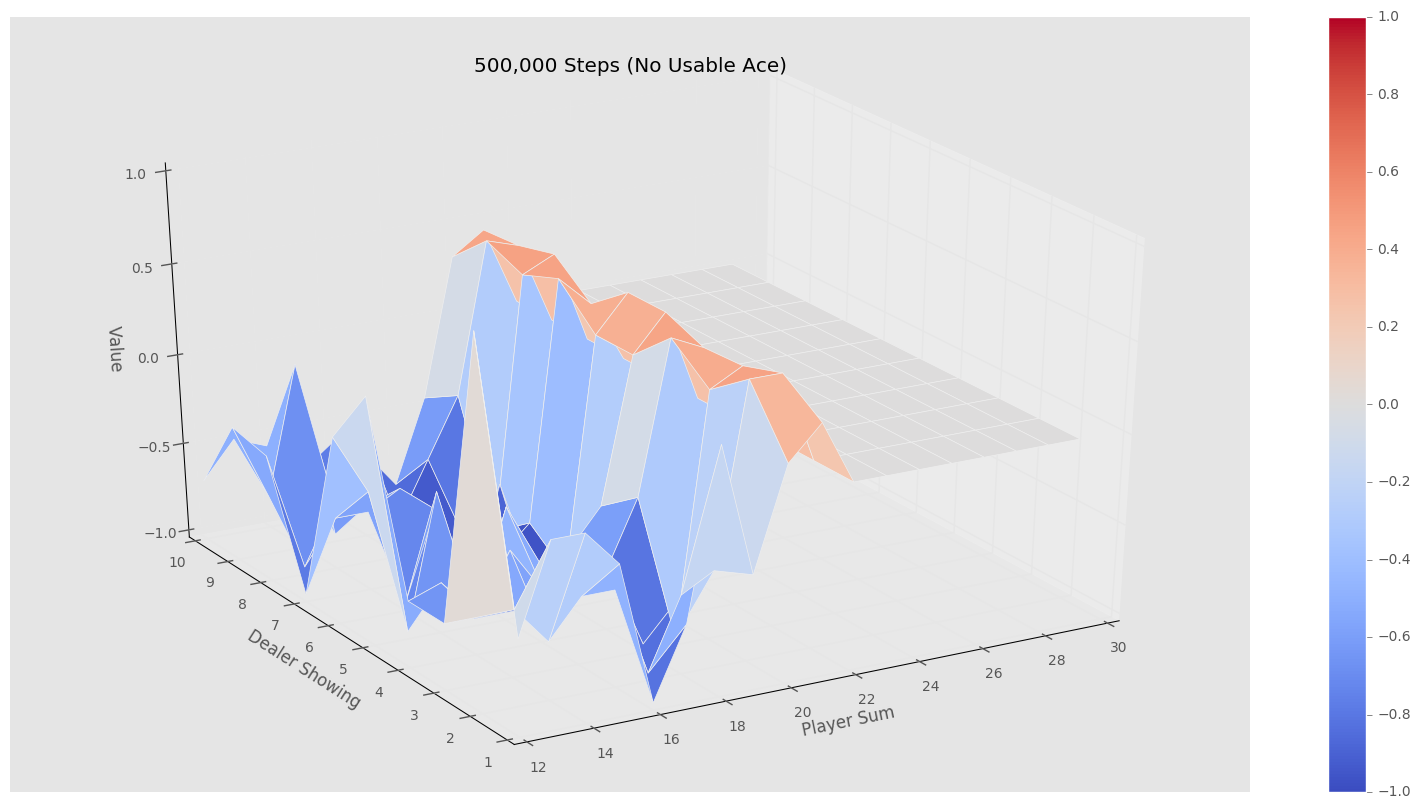

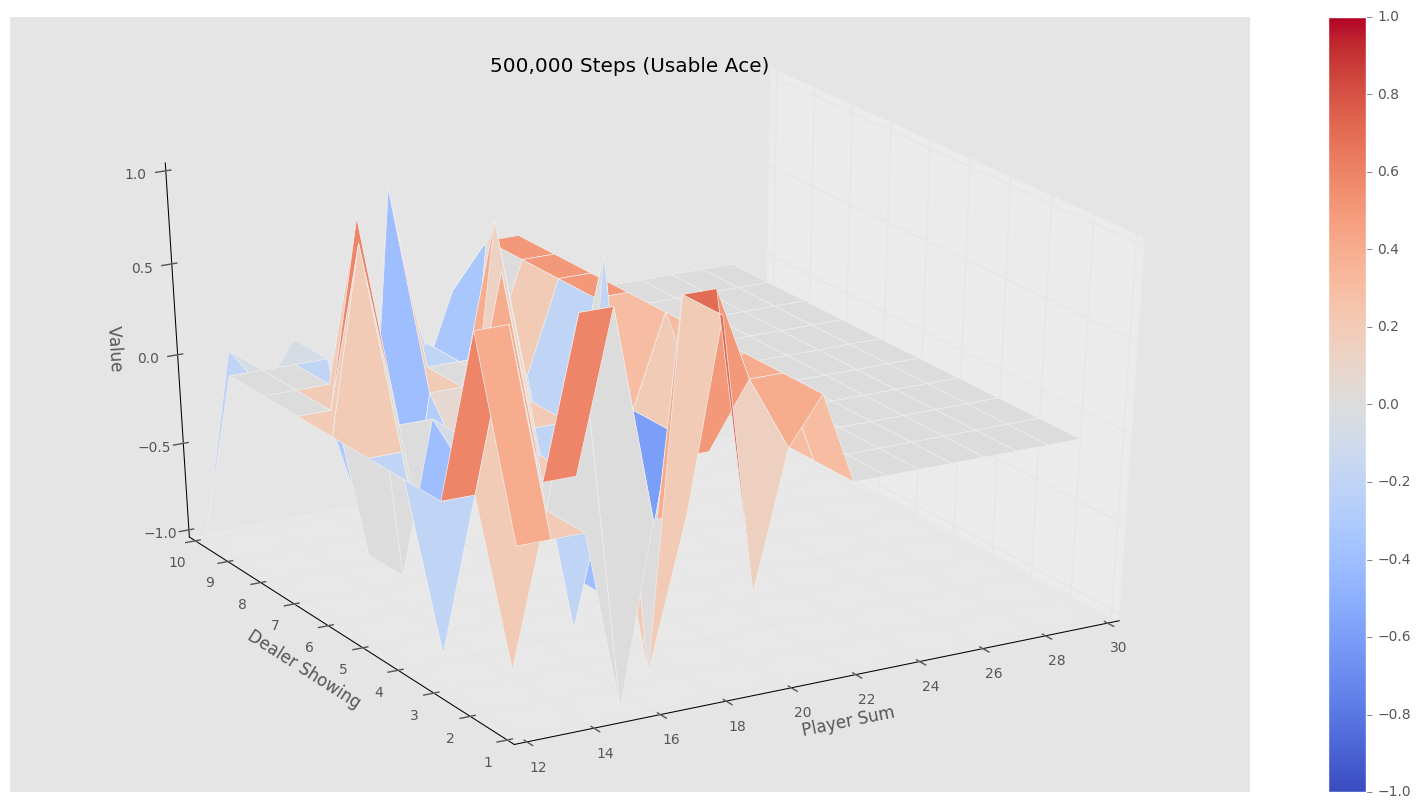

In [15]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500)
plotting.plot_value_function(V_500k, title="500,000 Steps")